In [309]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from pathlib import Path
import math
from resize.scipy import resize
import copy
from tqdm import tqdm

In [248]:
data_dir = Path("/iacl/pg22/sam/data/OASIS3")

In [249]:
!ls /iacl/pg22/sam/data/OASIS3

OASIS3_iso  OASIS3_LR  old


In [250]:
data_dir.exists()


True

In [251]:
list(data_dir.iterdir())

[PosixPath('/iacl/pg22/sam/data/OASIS3/old'),
 PosixPath('/iacl/pg22/sam/data/OASIS3/OASIS3_LR'),
 PosixPath('/iacl/pg22/sam/data/OASIS3/OASIS3_iso')]

In [252]:
#function that takes a np fourier transformation array and returns a np array with magnitude of fft
def magnitude(x_fft):
    x_mag = np.zeros(x_fft.shape)
    
    #finding the magnitude from fft, store in x_mag
    for m,f in zip(x_mag, x_fft):# a row in x_fft
        for i in range(len(m)): # each pixel in row
            m[i] = np.abs(f[i])  
    return x_mag

In [317]:
#function that takes a magnitude np array and returns a np array of decibels
def decibels(x_mag,epsilon=1e-8):
    x_db = np.zeros(x_mag.shape)
    for m, d in zip(x_mag, x_db):
        for i in range(len(d)):
            d[i] = 20*math.log10(m[i]+epsilon)
    return x_db
    

In [254]:
#high resolution directory
hrdata_dir = data_dir/ "OASIS3_iso"
img_path = list(hrdata_dir.iterdir())[0]
obj = nib.load(img_path)
x = obj.get_fdata(dtype=np.float32)


In [255]:
img_path

PosixPath('/iacl/pg22/sam/data/OASIS3/OASIS3_iso/sub-OAS30268_ses-d0096_run-01_T1w.nii.gz')

In [256]:
#process one slice of high res brain image
x_slice = x[:,:,128]

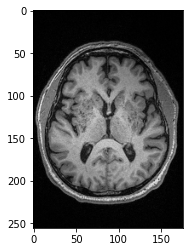

In [257]:
#visualize brain slice
plt.imshow(np.rot90(x_slice), cmap="Greys_r")

In [258]:
# apply fft, use n-dimension
#we use fftshift to shift zero-frequency component to the center the image
x_fft= np.fft.fftshift(np.fft.fftn(x_slice))

In [259]:
# find magnitude
x_mag = magnitude(x_fft)
#convert magnitude to db for better visualization
x_db = decibels(x_mag)

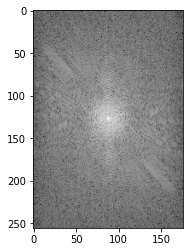

In [260]:
#plot fft of high res in db
plt.imshow(np.rot90(x_db), cmap="Greys_r")


In [261]:
#high res sagital
sag_slice = x[88,:,]

In [304]:
sag_slice

array([[49., 24., 12., ...,  1.,  0.,  0.],
       [15., 24.,  4., ...,  1.,  2.,  0.],
       [33., 10., 31., ...,  2.,  1.,  0.],
       ...,
       [ 7.,  5.,  0., ...,  1.,  0.,  0.],
       [ 6.,  0.,  6., ...,  3.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

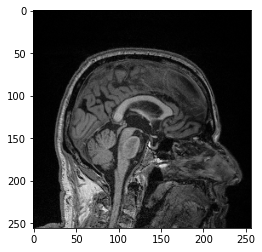

In [262]:
plt.imshow(np.rot90(sag_slice), cmap="Greys_r")

In [263]:
sag_fft = np.fft.fftshift(np.fft.fftn(sag_slice))

In [264]:
sag_fft.imag[0][200]

203.9711638036788

In [265]:
# sag_fft.real
sag_fft.imag

array([[    0.        ,  1439.58990905,  -175.03078798, ...,
         4151.54293804,   175.03078798, -1439.58990905],
       [-1074.81629453, -2294.96761881,   -68.74757059, ...,
         -767.09139834,   565.72954669,   216.86670873],
       [-4755.38115604, -3423.18153539, -1167.65653509, ...,
          564.31522669,  1043.79252738,  4148.73417518],
       ...,
       [ 2397.28638168,  7435.26248701,  -159.4080141 , ...,
        -2597.79938651, -2332.23382354, -2502.40663801],
       [ 4755.38115604, -4148.73417518, -1043.79252738, ...,
         1695.98362504,  1167.65653509,  3423.18153539],
       [ 1074.81629453,  -216.86670873,  -565.72954669, ...,
        -3605.30446834,    68.74757059,  2294.96761881]])

In [266]:
# find magnitude
sag_mag = magnitude(sag_fft)
#convert magnitude to db for better visualization
sag_db = decibels(sag_mag)

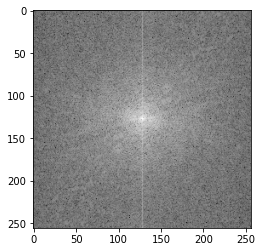

In [267]:
plt.imshow(np.rot90(sag_db), cmap="Greys_r")

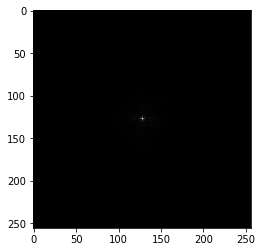

In [268]:
#low res directory
lrdata_dir = data_dir/ "OASIS3_LR/03-skip-05"



In [269]:
lr_path = list(lrdata_dir.iterdir())[0]
lrobj = nib.load(lr_path)
lr = lrobj.get_fdata(dtype=np.float32)


In [270]:
lr_slice = lr[:,:,16]

In [271]:
lr_slice.shape

(176, 256)

In [272]:
#resample the low res slice
lr_slice_upsampled = resize(lr_slice, dxyz=(1/4,1/4), order=3) #upscale by 4, order = 3

In [273]:
lr_slice_upsampled.shape

(704, 1024)

In [274]:
lr_fft= np.fft.fftshift(np.fft.fftn(lr_slice_upsampled))

In [275]:
lr_mag = magnitude(lr_fft)

lr_db = decibels(lr_mag)

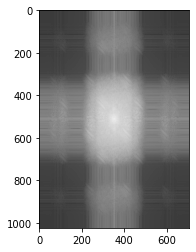

In [276]:
plt.imshow(np.rot90(lr_db), cmap="Greys_r")

In [1]:
#low res sagital
lrsg_slice = lr[88,:,]

NameError: name 'lr' is not defined

In [278]:
lrsg_slice.shape

(256, 32)

In [279]:
lrsg_slice_upsampled = resize(lrsg_slice, dxyz=(1,1/8), order=3)

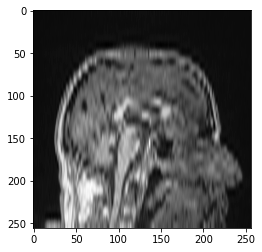

In [280]:
plt.imshow(np.rot90(lrsg_slice_upsampled), cmap="Greys_r")

In [281]:
lrsg_fft= np.fft.fftshift(np.fft.fftn(lrsg_slice_upsampled))

In [282]:
lrsg_mag = magnitude(lrsg_fft)
lrsg_db = decibels(lrsg_mag)

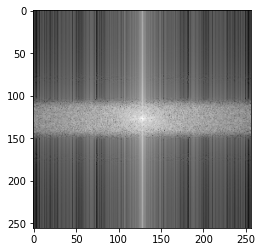

In [283]:
plt.imshow(np.rot90(lrsg_db), cmap="Greys_r")

---
1. fft a slice, but also keep the imag components
2. either crop to the center along 1 axis or set values to zero
2a. do this to both imag and real components
3. inverse fft to get the picture back (LR)
4. plot

In [415]:
#try with high res sagital, sag_fft
#try cropping out half from the center 

crop_fft = np.fft.fftshift(np.fft.fftn(sag_slice))

#crop y = 0 to 64
for i in range(len(sag_fft)):
    for j in range(len(sag_fft)//4):
        crop_fft.real[i][j] = 0
        crop_fft.imag[i][j]= 0

In [416]:
#crop y = 192 to 256
for i in range(len(sag_fft)):
    for j in range(192,len(sag_fft)):
        crop_fft.real[i][j] = 0
        crop_fft.imag[i][j]=0

In [418]:
mag = magnitude(crop_fft)
db = decibels(mag)

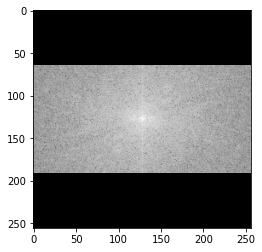

In [419]:
plt.imshow(np.rot90(db), cmap="Greys_r", vmin=0)

In [423]:
reverse = np.fft.ifftn(np.fft.ifftshift(crop_fft)).real


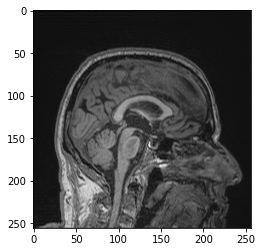

In [424]:
plt.imshow(np.rot90(reverse), cmap="Greys_r")

In [398]:
crop_mag = copy.deepcopy(sag_mag)
for i in range(len(sag_mag)):
    for j in range(len(sag_mag)//4):
        crop_mag[i][j] = 0

for i in range(len(sag_mag)):
    for j in range(192,len(sag_mag)):
        crop_mag[i][j] = 0

crop_db = decibels(crop_mag)

In [410]:
crop_db.max()

135.88147401656386

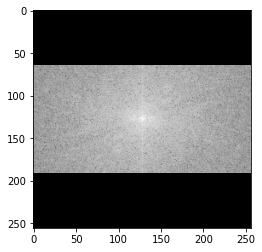

In [411]:
plt.imshow(np.rot90(crop_db), cmap="Greys_r", vmin=0)

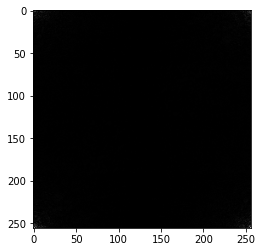

In [395]:
plt.imshow(np.rot90(crop_mag), cmap="Greys_r")

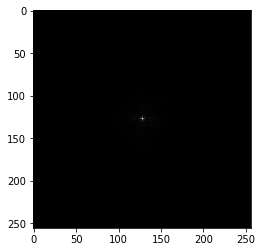

In [396]:
plt.imshow(np.rot90(sag_mag), cmap="Greys_r")

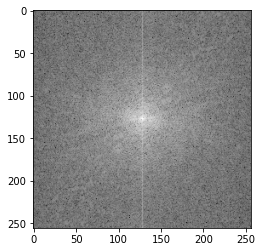

In [353]:

plt.imshow(np.rot90(sag_db), cmap="Greys_r")

In [355]:
sag_db.shape

(256, 256)

In [406]:
#reverse fft
crop_reverse = np.fft.ifftn(crop_mag)


In [407]:
#use abs to get scalar value of complex number
crop_reverse = crop_reverse.real

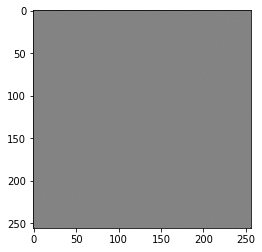

In [408]:
plt.imshow(np.rot90(crop_reverse), cmap="Greys_r")

In [383]:
#try cropping the array
crop2_fft = np.fft.fftn(sag_slice)

In [384]:
crop2_fft = crop2_fft[:,64:192]

In [385]:
crop2_mag= magnitude(crop2_fft)

In [386]:
crop2_db = decibels(crop2_mag)

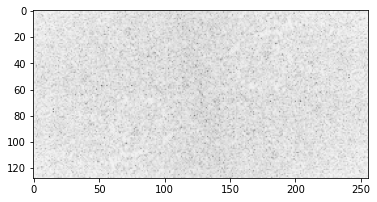

In [412]:
plt.imshow(np.rot90(crop2_db), cmap="Greys_r",vmin=0)

In [388]:
crop2_reverse = np.fft.ifftn(crop2_fft)

In [389]:
crop2_reverse = np.abs(crop2_reverse)

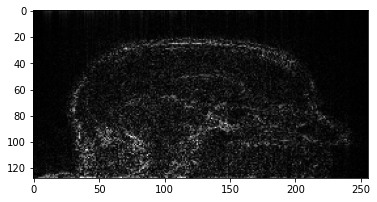

In [390]:
plt.imshow(np.rot90(crop2_reverse), cmap="Greys_r")

In [305]:
import time

In [306]:
def my_sleep():
    time.sleep(1)

In [310]:
for _ in tqdm(range(128)):
    my_sleep()

  6%|██▋                                        | 8/128 [00:08<02:14,  1.12s/it]


KeyboardInterrupt: 

---
# Here's an example of using resize

In [119]:
tmp_x = np.array([1,2,4,5,6.,4,5,22,5])

In [120]:
tmp_x.shape

(9,)

In [121]:
tmp_x_upsampled = resize(tmp_x, dxyz=(1/4,), order=3)
# note that the step is 1-over-the scale you want

In [1]:
tmp_x_upsampled.shape

NameError: name 'tmp_x_upsampled' is not defined

When visualizing the k-space of the LR image, try resizing first with different orders and see the effect. For example, order=0, 1, 2, 3, 5.